In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import os.path as path
import wget

In [2]:
!rm Data/*
file = 'ManchasSolares.dat.txt'
url = 'https://github.com/asegura4488/DataBase/blob/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

rm: Data/*: No such file or directory


In [4]:
data=np.loadtxt(Path_)
date= data[:,0]+data[:,1]/12
manchas= data[:,3]

In [5]:
ii= date >= 1900 

In [6]:
mean=np.mean(manchas[ii])
manchas= manchas[ii]-mean
date= date[ii]

Text(0, 0.5, 'Frecuencia')

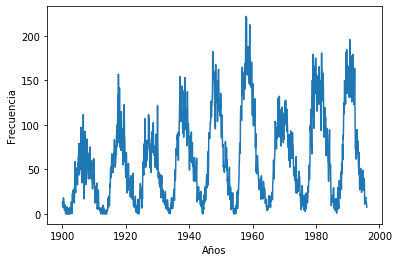

In [7]:
plt.plot(date, manchas+mean)
plt.xlabel("Años")
plt.ylabel("Frecuencia")

In [8]:
#Transformada de Fourier 
fft=np.fft.fft(manchas)
N=len(manchas)
freq=np.fft.fftfreq(N,1)
ffta=np.abs(fft)

<StemContainer object of 3 artists>

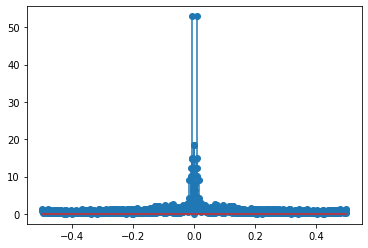

In [9]:
plt.stem(freq, 2.*ffta/N, use_line_collection="True")

In [10]:
#Mask
mask= freq < 0
fft2=fft.copy()
fft2[mask]=0.
ffta2=np.abs(fft2)

<StemContainer object of 3 artists>

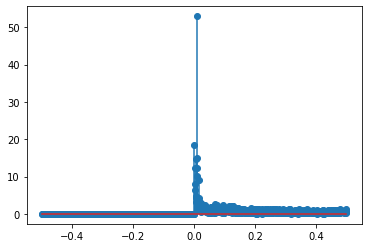

In [12]:
plt.stem(freq, 2.*ffta2/N, use_line_collection="True")

In [13]:
max_=np.argmax(ffta2)
f=freq[max_]
#Como es para cada año, debemos dividir entre la cantidad de meses para obtener correctamente el periodo
periodo= (1./f)/12.
print(periodo)

10.675925925925926


In [14]:
mayor=np.abs(freq) > f
menor= np.abs(freq) < f

In [15]:
fft[mayor | menor]=0
ffta= np.abs(fft)

<StemContainer object of 3 artists>

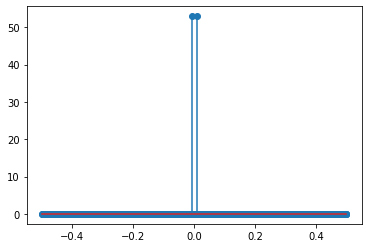

In [16]:
plt.stem(freq,2*ffta/N, use_line_collection="True")

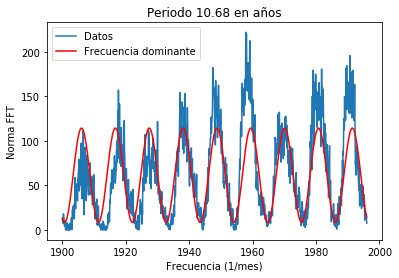

In [24]:
#Transformada inversa
inversa= np.fft.ifft(fft)
plt.plot(date, manchas+mean, label="Datos")
plt.plot(date, np.real(inversa)+mean, c="r", label= "Frecuencia dominante")
plt.title("Periodo {:.2f} en años".format(periodo))
plt.xlabel("Frecuencia (1/mes)")
plt.ylabel("Norma FFT")
plt.legend()
plt.savefig("figura1_fmanchas.png")